# Diet and Death Analysis                                                            Indraraj Naidu

In [1]:
#importing the libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('framingham.csv',low_memory=False)

4. What is the percentage of people in the study that have diabetes?

In [53]:
t=df.count()["DIABETES"]

In [54]:
#Total number of people in study
t

3842

In [68]:
n= df['DIABETES'].value_counts()[1]

In [69]:
#Number of people in the study who have biabetes is n
n

105

In [70]:
#%od people having diabetes
(n/t)*100

2.732951587714732


Now we need to compare this to the general population. Either a person is diagnosed as hav- ing diabetes or not. We can use the multinomial distribution to generate a sample of two val- ues. Say we have an event that has .75 probability of occurring. Then the following will count the number of times the event does not occur and not occur in a sample of 1000.
two_value_probabilities = [0.25, 0.75]
sample_size = 1000
np.random.multinomial(sample_size, two_value_probabilities)
Using this we can compute the number of people we would expect to have diabetes in a sam- ple of 5,000, which we need to convert to a percentage. Now do this 200 times.

5. Producethehistogramofthepercentofpeopleinyour200sampleswithdiabetes.

In [102]:
n=0
mult=[]
dia=[]
while(n<200):
    two_value_probabilities = [0.0093,0.9907]
    sample_size = 5000
    x,y= np.random.multinomial(sample_size, two_value_probabilities)
    dia.append(x)
    mult.append((x/(x+y))*100)
    n = n + 1

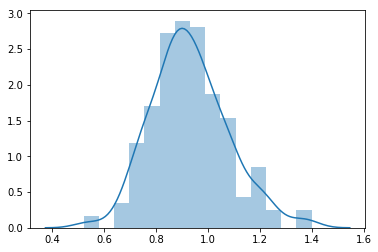

In [96]:
sns.distplot(mult)


6. Computethe95%confidenceintervalofthe200valuesin#5


In [104]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
n = len(dia)
m = mean(dia)
std_err = sem(dia)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print(round(start))
end = m + h
print(round(end))

45.0
47.0


7. Is the study representative of the general population? Why or why not?

The study is not representative of the general population as the number of people with diabetes in the suudy falls outside the confidence interval. The sample population in the study is biased. 

In the file framingham.csv the column TOTCHOL gives the total cholesterol of each person in the study. The column ANYCHD indicates if the person has any heard disease.

8. Plot the cholesterolvaluesforthepeoplewithheartdisease,forthepeoplewithoutheart disease.

In [106]:
hrt = pd.read_csv('framingham.csv',low_memory=False)

In [107]:
hrt = hrt.loc[:,['TOTCHOL','ANYCHD']]

In [108]:
hrt

,TOTCHOL,ANYCHD
0,195.0,1
1,250.0,0
2,245.0,0
3,225.0,0
4,285.0,0
5,228.0,1
6,205.0,1
7,313.0,0
8,260.0,0
9,225.0,0


In [120]:
hrtdis = hrt.loc[hrt.ANYCHD == 1]

In [121]:
hrtdis

,TOTCHOL,ANYCHD
0,195.0,1
5,228.0,1
6,205.0,1
20,234.0,1
23,294.0,1
25,272.0,1
30,175.0,1
31,214.0,1
39,195.0,1
42,252.0,1


In [110]:
nohrtdis = hrt.loc[hrt.ANYCHD != 1]

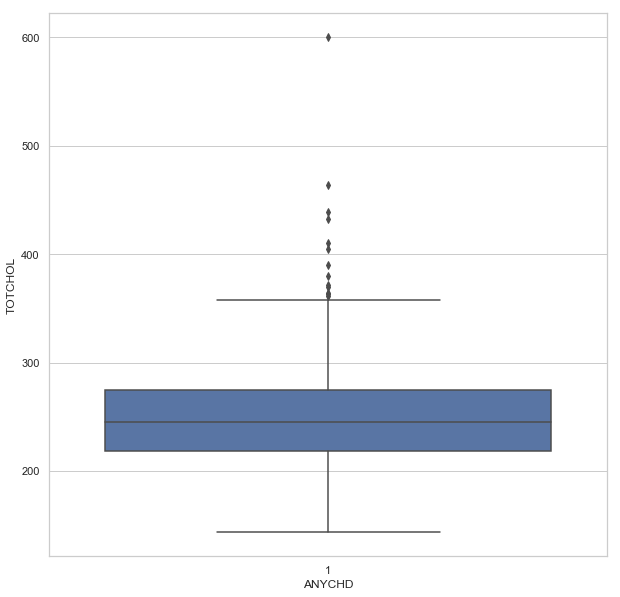

In [131]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxplot(data=hrtdis, x='ANYCHD',y='TOTCHOL')

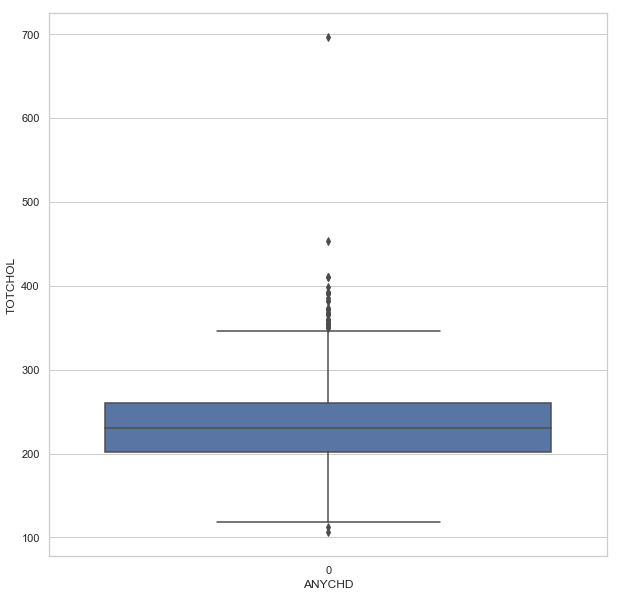

In [132]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxplot(data=nohrtdis, x='ANYCHD',y='TOTCHOL')

9. Compute the 95% confidence interval of the cholesterol values for the people with heart disease, for the people with out heart disease.

In [122]:
#with heart disease

from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
n = len(hrtdis.TOTCHOL)
m = mean(hrtdis.TOTCHOL)
std_err = sem(dia)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print(start)
end = m + h
print(end)

248.55361633098312
250.41074425601897


In [123]:
#without heart disease

from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
n = len(nohrtdis.TOTCHOL)
m = mean(nohrtdis.TOTCHOL)
std_err = sem(dia)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print(start)
end = m + h
print(end)

231.91848676585073
233.77403400977255



10.What can we deduce about cholesterol values and heart disease?


In [124]:
hrt_cor = pd.read_csv('framingham.csv',low_memory=False)

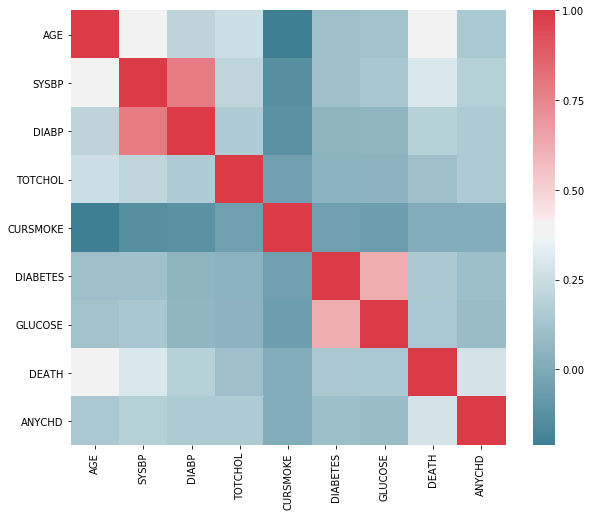

In [126]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = hrt_cor.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

There is a low correlation between Total cholesterol and heart disease, but the corellation does exist. The box plot shows that there is a higher chance of heart disease whit higher level of cholesterol. 